In [68]:
import pandas as pd

covid_df = pd.read_csv('data/covid_data.csv')
vaccination_df = pd.read_csv('data/country_vaccinations.csv')
vaccination_df = vaccination_df[['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']]


In [69]:
covid_df = covid_df.groupby(['date','country'], as_index=False)[['confirmed', 'deaths', 'recovered']].sum()
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df['active'] = covid_df['confirmed'] - covid_df['deaths'] - covid_df['recovered']
covid_df = covid_df.sort_values(['country', 'date'])
covid_df['dayly_confirmed'] = covid_df.groupby('country')['confirmed'].diff()
covid_df['dayly_deaths'] = covid_df.groupby('country')['deaths'].diff()
covid_df['dayly_recovered'] = covid_df.groupby('country')['recovered'].diff()
vaccination_df['date'] = pd.to_datetime(vaccination_df['date'])

In [70]:
covid_data = covid_df.merge(vaccination_df, how='left', on=['date', 'country'])
covid_data['death_rate'] = covid_data['deaths'] / covid_data['confirmed'] * 100
covid_data['recover_rate'] = covid_data['recovered'] / covid_data['confirmed'] * 100

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

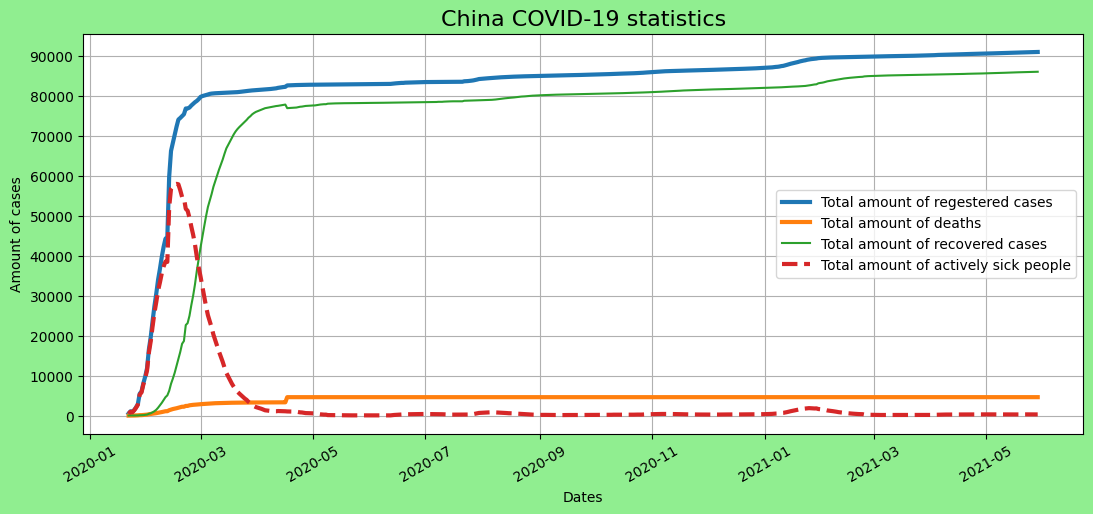

In [72]:
china_df = covid_data[covid_data['country'] == 'China'].sort_values(by='date')
china_grouped = china_df.groupby('date')[['confirmed', 'active', 'deaths', 'recovered']].sum()

fig = plt.figure(figsize=(10,4), facecolor='lightgreen')
axes = fig.add_axes([0,0,1,1])
axes.plot(china_grouped['confirmed'], label = 'Total amount of regestered cases', lw=3)
axes.plot(china_grouped['deaths'], label = 'Total amount of deaths', lw=3)
axes.plot(china_grouped['recovered'], label = 'Total amount of recovered cases')
axes.plot(china_grouped['active'], label = 'Total amount of actively sick people', lw=3, linestyle = 'dashed')

axes.set_title('China COVID-19 statistics', fontsize=16)
axes.set_xlabel('Dates')
axes.set_ylabel('Amount of cases')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();


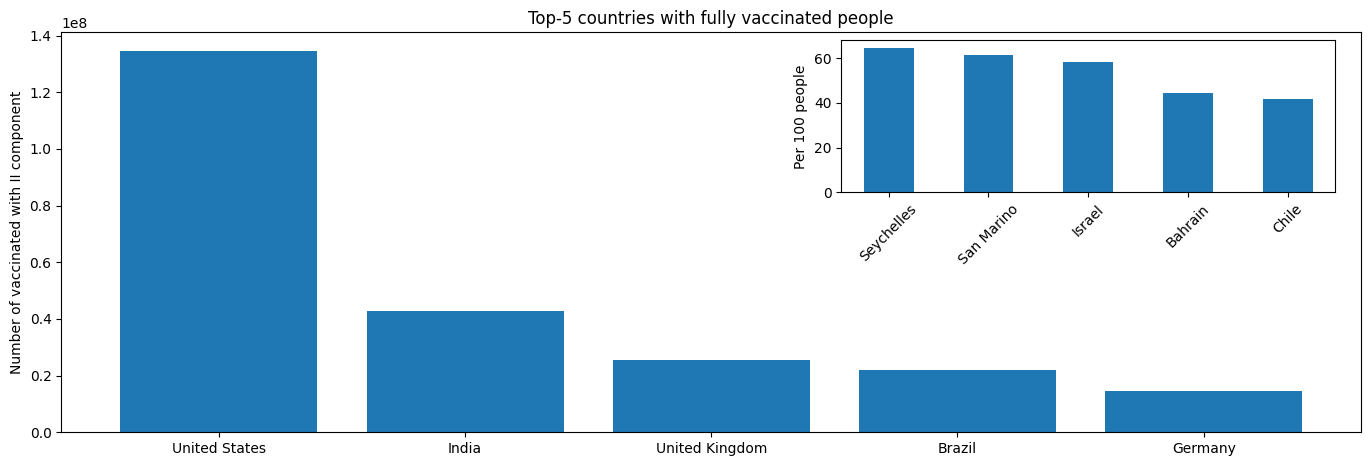

In [73]:
vacc_country = covid_data.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_perhundred = covid_data.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

fig = plt.figure(figsize=(13,4))
main_axes = fig.add_axes([0,0,1,1])
main_axes.bar(
    x = vacc_country.index,
    height = vacc_country,
);
main_axes.set_ylabel('Number of vaccinated with II component')
main_axes.set_title('Top-5 countries with fully vaccinated people')
insert_axes = fig.add_axes([0.6,0.6,0.38,0.38])
insert_axes.bar(
    x = vacc_country_perhundred.index,
    height = vacc_country_perhundred,
    width = 0.5
);

insert_axes.set_ylabel('Per 100 people')
insert_axes.xaxis.set_tick_params(rotation=45)


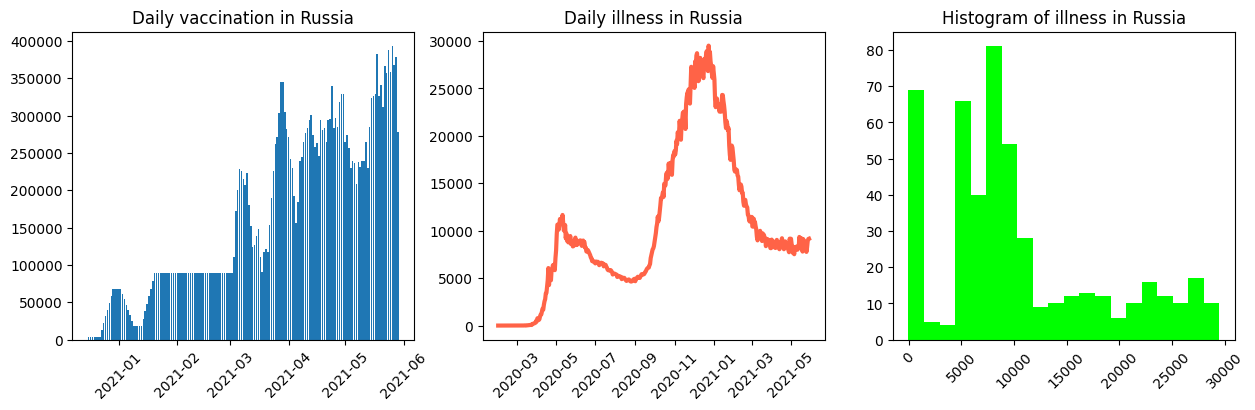

In [74]:
russian_df = covid_data[covid_data['country'] == 'Russia']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,4))

axes[0].bar(
    x = russian_df['date'],
    height = russian_df['daily_vaccinations'],
    label = 'number of vaccinated')
axes[0].set_title('Daily vaccination in Russia')
axes[0].xaxis.set_tick_params(rotation = 45)

axes[1].plot(
    russian_df['date'],
    russian_df['dayly_confirmed'],
    label='Number of confirmed ill',
    color = 'tomato',
    lw = 3
)
axes[1].set_title('Daily illness in Russia')
axes[1].xaxis.set_tick_params(rotation = 45)

axes[2].hist(
    x = russian_df['dayly_confirmed'],
    label = 'Number of ill',
    color = 'lime',
    bins = 20
)

axes[2].set_title('Histogram of illness in Russia');
axes[2].xaxis.set_tick_params(rotation = 45)


In [75]:
import seaborn as sns

In [83]:
covid_data['total_vaccinations'].nunique()

10298

In [76]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid = covid_data[covid_data['country'].isin(countries)]

population = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
],
columns = ['country', 'population'])

croped_covid = croped_covid.merge(population, on='country')

croped_covid['daily_confirmed_per_hundred'] = croped_covid['dayly_confirmed'] / croped_covid['population'] * 100
croped_covid

date         country  confirmed    deaths  recovered     active  \
0    2020-01-23       Australia        0.0       0.0        0.0        0.0   
1    2020-01-25       Australia        4.0       0.0        0.0        4.0   
2    2020-01-26       Australia        4.0       0.0        0.0        4.0   
3    2020-01-27       Australia        5.0       0.0        0.0        5.0   
4    2020-01-28       Australia        5.0       0.0        0.0        5.0   
...         ...             ...        ...       ...        ...        ...   
2435 2021-05-25  United Kingdom  4483177.0  128001.0    15453.0  4339723.0   
2436 2021-05-26  United Kingdom  4486168.0  128010.0    15477.0  4342681.0   
2437 2021-05-27  United Kingdom  4489552.0  128020.0    15480.0  4346052.0   
2438 2021-05-28  United Kingdom  4493582.0  128030.0    15480.0  4350072.0   
2439 2021-05-29  United Kingdom  4496823.0  128037.0    15481.0  4353305.0   

      dayly_confirmed  dayly_deaths  dayly_recovered  total_vaccinations  \
0                 NaN           NaN              NaN                 NaN   
1                 4.0           0.0              0.0                 NaN   
2                 0.0           0.0              0.0                 NaN   
3                 1.0           0.0              0.0                 NaN   
4                 0.0           0.0              0.0                 NaN   
...               ...           ...              ...                 ...   
2435           2417.0          15.0              8.0          61995062.0   
2436           2991.0           9.0             24.0          62658639.0   
2437           3384.0          10.0              3.0          63349252.0   
2438           4030.0          10.0              0.0          63989645.0   
2439           3241.0           7.0              1.0          64592019.0   

      people_vaccinated  people_vaccinated_per_hundred  \
0                   NaN                            NaN   
1                   NaN                            NaN   
2                   NaN                            NaN   
3                   NaN                            NaN   
4                   NaN                            NaN   
...                 ...                            ...   
2435         38378564.0                          56.27   
2436         38614683.0                          56.61   
2437         38871200.0                          56.99   
2438         39075642.0                          57.29   
2439         39259168.0                          57.56   

      people_fully_vaccinated  people_fully_vaccinated_per_hundred  \
0                         NaN                                  NaN   
1                         NaN                                  NaN   
2                         NaN                                  NaN   
3                         NaN                                  NaN   
4                         NaN                                  NaN   
...                       ...                                  ...   
2435               23616498.0                                34.62   
2436               24043956.0                                35.25   
2437               24478052.0                                35.89   
2438               24914003.0                                36.53   
2439               25332851.0                                37.14   

      daily_vaccinations                                      vaccines  \
0                    NaN                                           NaN   
1                    NaN                                           NaN   
2                    NaN                                           NaN   
3                    NaN                                           NaN   
4                    NaN                                           NaN   
...                  ...                                           ...   
2435            591301.0  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
2436            595544.0  Moder

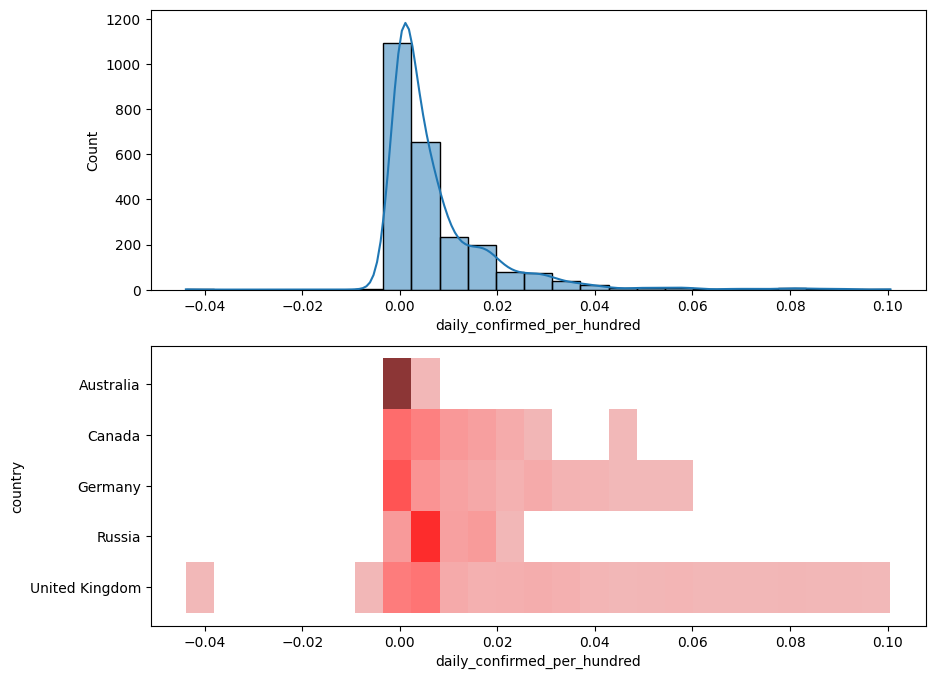

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
sns.histplot(
    data = croped_covid,
    x='daily_confirmed_per_hundred',
    bins = 25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title = 'Histogram of daily illness per 100 population'
sns.histplot(
    data =croped_covid,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

In [78]:
fig = plt.figure(figsize=(10,8))
boxplot = sns.boxplot(
    data=croped_covid,
    y='country',
    x='death_rate',
    orient = 'h',
    width = 0.9
)
boxplot.set_title('Letality distibution')
boxplot.set_xlabel('Letality')
boxplot.set_ylabel('Country')
boxplot.grid()

In [ ]:
fig = plt.figure(figsize=(10,7))
croped_covid['quarter'] = croped_covid['date'].dt.quarter

barplot = sns.barplot(
    data = croped_covid,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter'
)
barplot.set_title('Average percentage of ill people in quarters');

In [ ]:
jointplot = sns.jointplot(
    data = croped_covid,
    x='people_fully_vaccinated_per_hundred',
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim=(0,40),
    ylim=(0, 0.1),
    height=8
)

In [ ]:
pivot = croped_covid.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
pivot

In [ ]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Heatmap of vaccination', fontsize=14);

In [ ]:
croped_covid['confirmed_per_hundred'] = croped_covid['confirmed'] / croped_covid['population'] * 100
pivot = croped_covid.pivot_table(values='confirmed_per_hundred', columns='date', index='country')
pivot.columns = pivot.columns.astype('string')
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')

In [ ]:
fig = plt.figure(figsize=(10,10))

boxplot = sns.boxplot(
    data = croped_covid,
    x='recover_rate',
    y='country',
    width=0.9

)

In [19]:
import plotly
import plotly.express as px
plotly.__version__

'5.18.0'

In [89]:
line_data = covid_data.groupby('date', as_index=False).sum()
fig = px.line(
    data_frame=line_data,
    x='date',
    y= 'daily_vaccinations',
    height=500,
    width=1000, 
    title='HUI'
)
fig.show()

In [87]:
vac_df = covid_data.groupby('country', as_index=False)['total_vaccinations'].sum()
vac_df

country  total_vaccinations
0                       Afghanistan           3231647.0
1                           Albania          23239095.0
2                           Algeria             75030.0
3                           Andorra            249370.0
4                            Angola           4477345.0
..                              ...                 ...
216              West Bank and Gaza                 0.0
217                           Yemen            122625.0
218                          Zambia           2337902.0
219                        Zimbabwe          28235301.0
220  occupied Palestinian territory                 0.0

[221 rows x 2 columns]

In [88]:
#преобразуем даты в строковый формат
choropleth_data = covid_data.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')

#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations="country", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="confirmed", #от чего зависит цвет
    animation_frame="date", #анимационный бегунок
    range_color=[0, 30e6], #диапазон цвета
    title='Global Spread of COVID-19', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

In [85]:
choropleth_data = covid_data.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')

fig = px.choropleth(
    data_frame=choropleth_data,
    locations="country",
    locationmode = "country names",
    color = 'total_vaccinations',
    animation_frame='date',
    title='Global COVID vaccinations',
    width = 1000,
    height= 700,
    color_continuous_scale='Greens'
)

fig.show()